In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import KFold

In [88]:
df = pd.read_csv('./data/소성가공 압출공정 데이터셋.csv')
df.head()

,date,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,2020 10 30 00:00:04,297,222,251,267,209,219,229,239,240,239,241,240,240,40,41,0.0,71.2215,72,0.0
1,2020 10 30 00:00:09,297,222,251,268,210,219,229,239,240,239,240,240,240,40,41,0.0,71.2096,72,0.0
2,2020 10 30 00:00:14,297,222,251,267,210,219,229,239,240,239,240,240,240,40,41,0.0,71.1977,72,0.0
3,2020 10 30 00:00:19,297,222,251,267,210,219,229,240,240,239,241,240,240,40,41,0.0,71.1977,72,0.0
4,2020 10 30 00:00:24,297,222,251,267,210,219,229,239,240,239,241,240,240,40,41,0.0,71.1977,72,0.0


In [89]:
df_copy = df.copy()
df_copy.columns

Index(['date', 'EX5.MELT_TEMP', 'EX4.MELT_TEMP', 'EX3.MELT_TEMP',
       'EX2.MELT_TEMP', 'EX1.Z1_PV', 'EX1.Z2_PV', 'EX1.Z3_PV', 'EX1.Z4_PV',
       'EX1.A1_PV', 'EX1.A2_PV', 'EX1.H1_PV', 'EX1.H2_PV', 'EX1.H3_PV',
       'EX1.H4_PV', 'EX1.H2O_PV', 'EX1.MELT_P_PV', 'EX1.MD_PV', 'EX1.MD_TQ',
       'passorfail'],
      dtype='object')

In [90]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17280 non-null  object 
 1   EX5.MELT_TEMP  17280 non-null  int64  
 2   EX4.MELT_TEMP  17280 non-null  int64  
 3   EX3.MELT_TEMP  17280 non-null  int64  
 4   EX2.MELT_TEMP  17280 non-null  int64  
 5   EX1.Z1_PV      17280 non-null  int64  
 6   EX1.Z2_PV      17280 non-null  int64  
 7   EX1.Z3_PV      17280 non-null  int64  
 8   EX1.Z4_PV      17280 non-null  int64  
 9   EX1.A1_PV      17280 non-null  int64  
 10  EX1.A2_PV      17280 non-null  int64  
 11  EX1.H1_PV      17280 non-null  int64  
 12  EX1.H2_PV      17280 non-null  int64  
 13  EX1.H3_PV      17280 non-null  int64  
 14  EX1.H4_PV      17280 non-null  int64  
 15  EX1.H2O_PV     17280 non-null  int64  
 16  EX1.MELT_P_PV  17280 non-null  float64
 17  EX1.MD_PV      17280 non-null  float64
 18  EX1.MD

In [91]:
df_copy.shape

(17280, 20)

In [92]:
df_copy.describe()

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
count,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17264.000000
mean,296.390336,221.892245,251.021470,266.929340,209.786516,219.619387,229.677951,239.676273,239.576100,239.572106,239.590278,239.599769,239.627199,40.372338,42.125637,6.010608,70.897139,71.895833,0.006372
std,0.588004,0.369363,0.637443,0.577904,1.628204,0.496280,0.473549,0.477824,0.501628,0.586524,0.562705,0.529909,0.547126,1.802481,3.367409,5.914024,4.494657,2.736710,0.079570
min,294.000000,219.000000,249.000000,265.000000,201.000000,217.000000,228.000000,237.000000,239.000000,237.000000,237.000000,237.000000,236.000000,35.000000,37.000000,0.000000,0.000000,0.000000,0.000000
25%,296.000000,222.000000,251.000000,267.000000,209.000000,219.000000,229.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,39.000000,39.000000,0.000000,71.185800,72.000000,0.000000
50%,296.000000,222.000000,251.000000,267.000000,210.000000,220.000000,230.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,40.000000,42.000000,4.812500,71.197700,72.000000,0.000000
75%,297.000000,222.000000,251.000000,267.000000,210.000000,220.000000,230.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,42.000000,45.000000,10.062500,71.209600,72.000000,0.000000
max,300.000000,223.000000,253.000000,269.000000,218.000000,221.000000,232.000000,242.000000,241.000000,242.000000,242.000000,241.000000,244.000000,44.000000,49.000000,22.662500,75.612600,72.000000,1.000000


In [93]:
df_copy.isnull().sum()

date              0
EX5.MELT_TEMP     0
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP     0
EX1.Z1_PV         0
EX1.Z2_PV         0
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
passorfail       16
dtype: int64

In [94]:
frauds = df_copy[df_copy.passorfail == 1].shape[0]
normal = df_copy[df_copy.passorfail == 0].shape[0]
fraud_rate = frauds/(frauds+normal)*100
print(f'양품 수: {normal} 불량 수: {frauds}\n불량률: {fraud_rate}')

양품 수: 17154 불량 수: 110
불량률: 0.6371640407784986


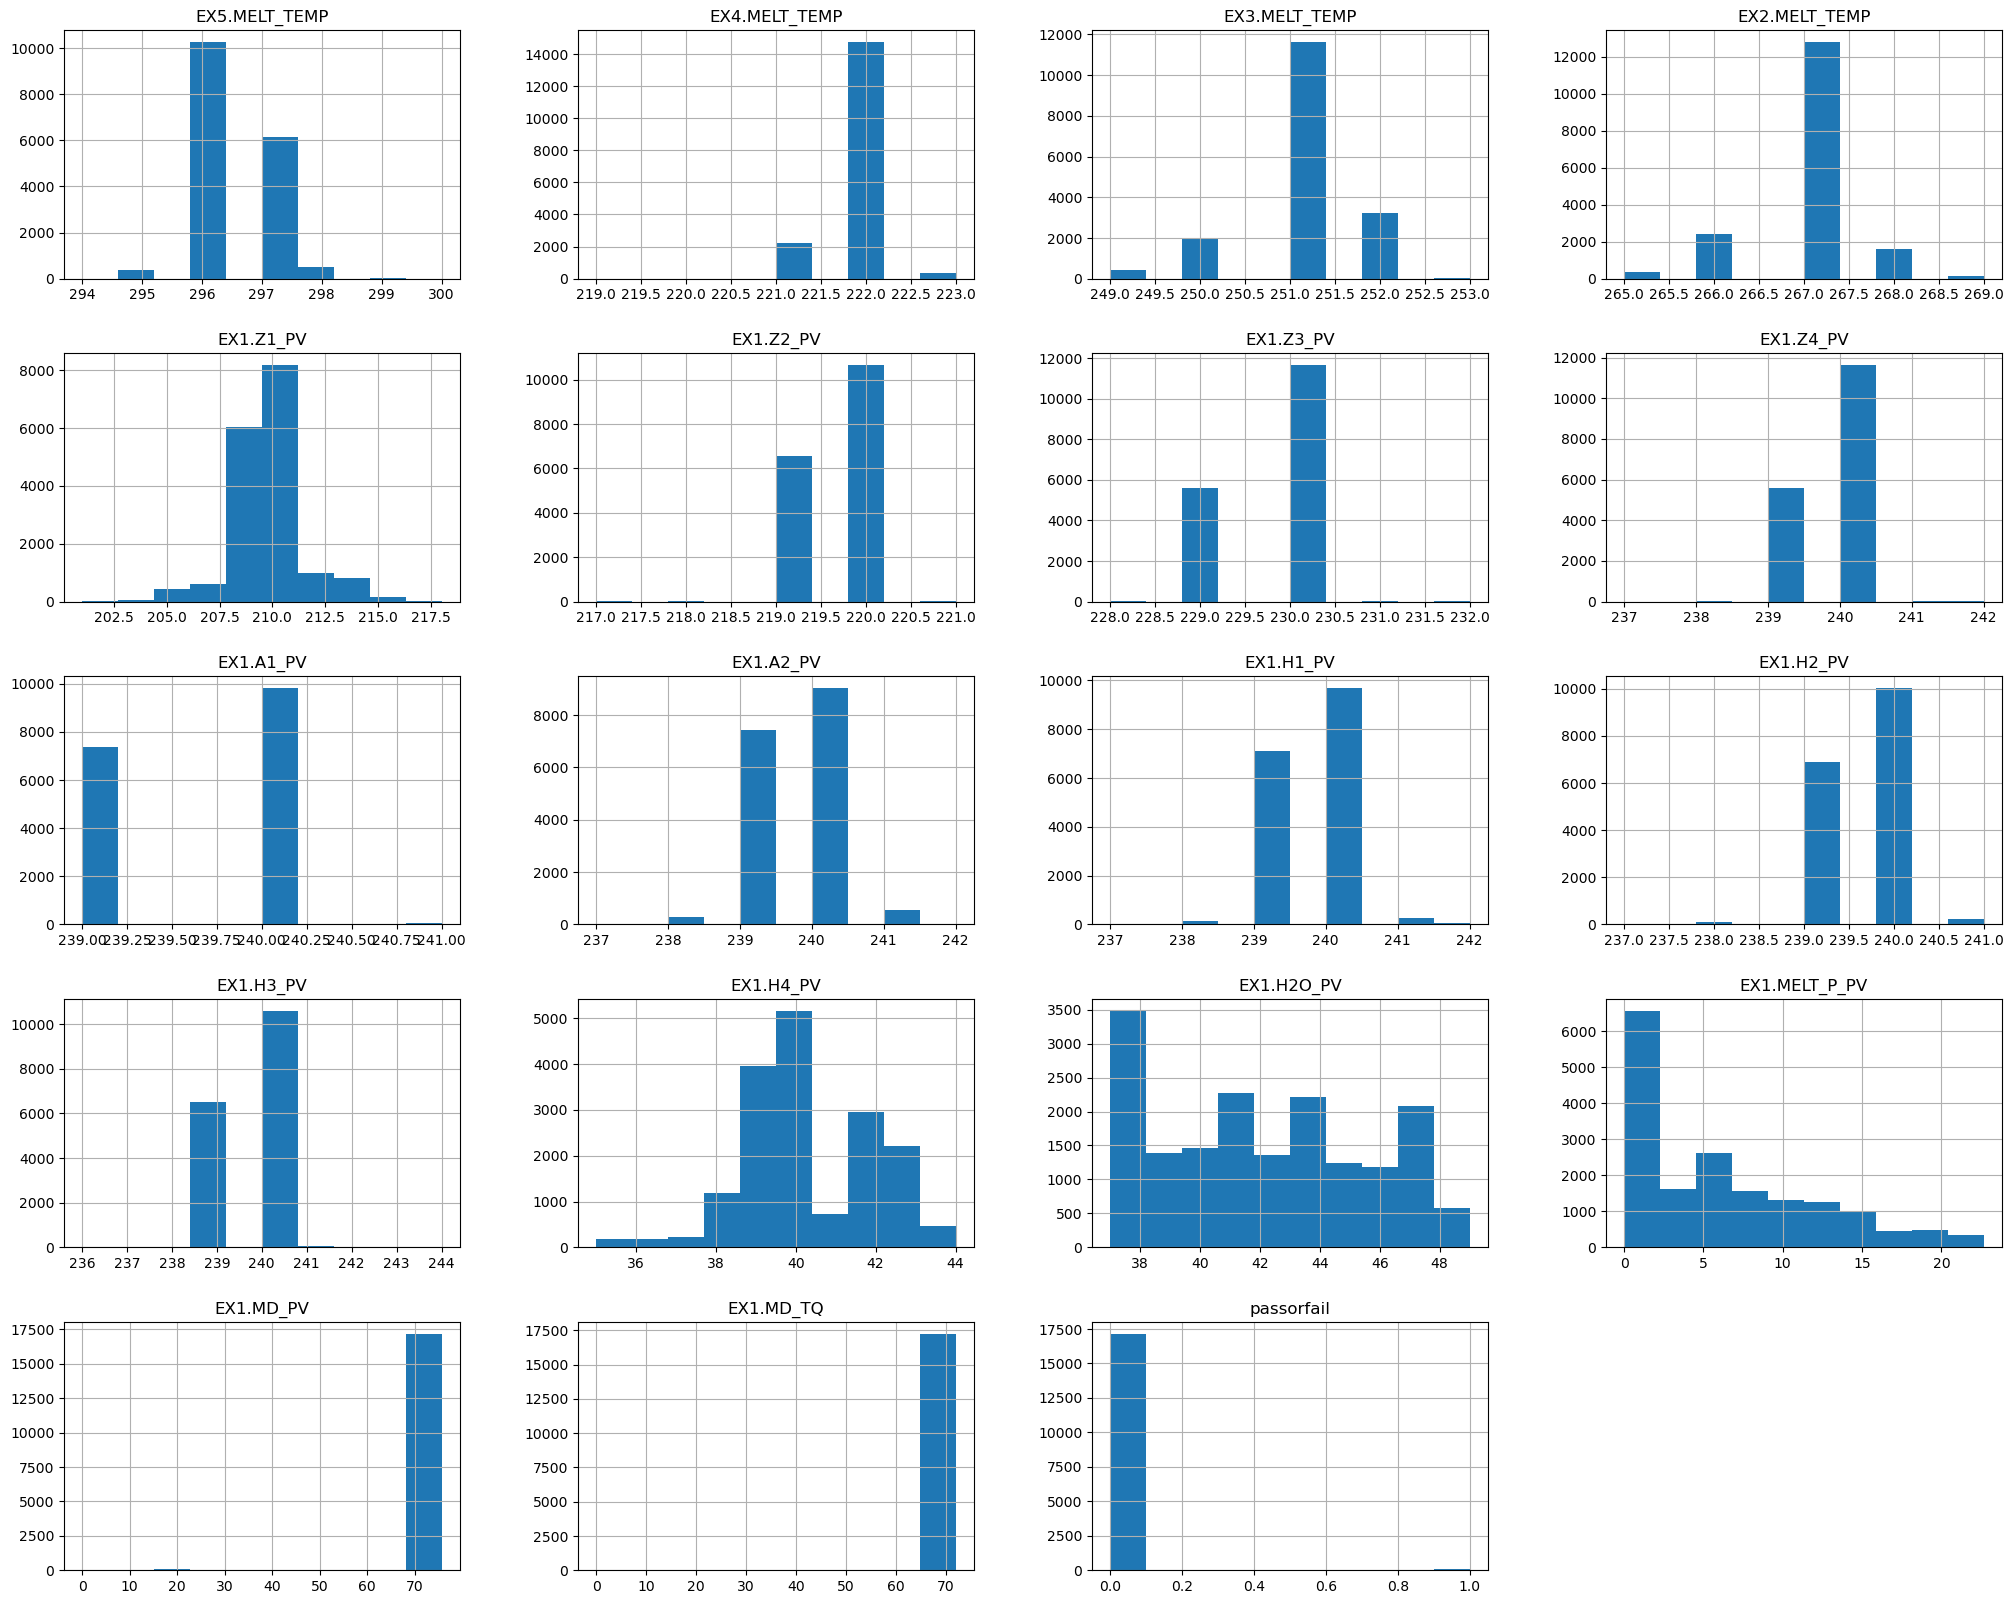

In [95]:
df_copy.hist(figsize=(25,20))
plt.show()

In [96]:
df_copy=df_copy[df_copy.columns[1:]]

In [97]:
import pandas as pd

Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# IQR 하한범위를 벗어나는 데이터 확인
outlier_undercondition = (df_copy < (Q1 - 1.5 * IQR))
outliers = df_copy[outlier_undercondition]

# IQR 상한범위를 벗어나는 데이터 확인
outlier_overcondition = (df_copy > (Q3 + 1.5 * IQR))
outliers = df_copy[outlier_overcondition]

# 하한이상치 개수 확인
underoutlier_count = outlier_undercondition.sum()
print(underoutlier_count[:-1])
# 상한이상치 개수 확인
overoutlier_count = outlier_overcondition.sum()
print(overoutlier_count[:-1])

# IQR 범위를 벗어나는 데이터 확인
outlier_condition = (df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))
outliers = df_copy[outlier_condition]

# 이상치 개수 확인
outlier_count = outlier_condition.sum()
print(outlier_count)

EX5.MELT_TEMP       2
EX4.MELT_TEMP    2200
EX3.MELT_TEMP    2430
EX2.MELT_TEMP    2752
EX1.Z1_PV        1090
EX1.Z2_PV          13
EX1.Z3_PV           0
EX1.Z4_PV           1
EX1.A1_PV           0
EX1.A2_PV           1
EX1.H1_PV          28
EX1.H2_PV           1
EX1.H3_PV          36
EX1.H4_PV           0
EX1.H2O_PV          0
EX1.MELT_P_PV       0
EX1.MD_PV         153
EX1.MD_TQ          25
dtype: int64
EX5.MELT_TEMP      14
EX4.MELT_TEMP     342
EX3.MELT_TEMP    3231
EX2.MELT_TEMP    1746
EX1.Z1_PV        1988
EX1.Z2_PV           0
EX1.Z3_PV           9
EX1.Z4_PV          15
EX1.A1_PV           0
EX1.A2_PV          12
EX1.H1_PV          46
EX1.H2_PV           0
EX1.H3_PV          67
EX1.H4_PV           0
EX1.H2O_PV          0
EX1.MELT_P_PV       0
EX1.MD_PV         182
EX1.MD_TQ           0
dtype: int64
EX5.MELT_TEMP      16
EX4.MELT_TEMP    2542
EX3.MELT_TEMP    5661
EX2.MELT_TEMP    4498
EX1.Z1_PV        3078
EX1.Z2_PV          13
EX1.Z3_PV           9
EX1.Z4_PV          16
EX1.A1

In [98]:
outlier_ratio = (outlier_condition.sum() / len(df_copy)) * 100
print(outlier_ratio)

EX5.MELT_TEMP     0.092593
EX4.MELT_TEMP    14.710648
EX3.MELT_TEMP    32.760417
EX2.MELT_TEMP    26.030093
EX1.Z1_PV        17.812500
EX1.Z2_PV         0.075231
EX1.Z3_PV         0.052083
EX1.Z4_PV         0.092593
EX1.A1_PV         0.000000
EX1.A2_PV         0.075231
EX1.H1_PV         0.428241
EX1.H2_PV         0.005787
EX1.H3_PV         0.596065
EX1.H4_PV         0.000000
EX1.H2O_PV        0.000000
EX1.MELT_P_PV     0.000000
EX1.MD_PV         1.938657
EX1.MD_TQ         0.144676
passorfail        0.636574
dtype: float64


In [99]:
X_len = len(df.columns)-1
cols = list(df.columns[1:X_len])+list([df.columns[-1]])
preprocessed_df = df_copy.loc[:,cols]
preprocessed_df = preprocessed_df.astype(float)
preprocessed_df = preprocessed_df.astype({'passorfail':'float32'})
preprocessed_df

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.2215,72.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0000,71.2096,72.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,229.0,240.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,296.0,222.0,252.0,267.0,215.0,220.0,230.0,240.0,240.0,240.0,240.0,240.0,240.0,40.0,42.0,2.8000,71.2096,72.0,NaN
17276,296.0,222.0,252.0,267.0,215.0,220.0,230.0,240.0,240.0,240.0,240.0,240.0,240.0,40.0,42.0,2.8438,71.2096,72.0,NaN
17277,296.0,222.0,252.0,267.0,214.0,220.0,230.0,240.0,240.0,240.0,240.0,240.0,240.0,40.0,42.0,2.8875,71.1858,72.0,NaN
17278,296.0,222.0,252.0,267.0,214.0,220.0,230.0,240.0,240.0,240.0,240.0,240.0,240.0,40.0,42.0,2.8875,71.2096,72.0,NaN


In [100]:
preprocessed_df = preprocessed_df.dropna()
preprocessed_df

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.2215,72.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0000,71.2096,72.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,229.0,240.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,296.0,222.0,252.0,267.0,211.0,219.0,229.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,2.8000,71.2215,72.0,0.0
17260,296.0,222.0,252.0,267.0,211.0,219.0,230.0,240.0,240.0,240.0,239.0,240.0,240.0,40.0,42.0,2.8438,71.1977,72.0,0.0
17261,296.0,222.0,252.0,267.0,212.0,219.0,230.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,2.8438,71.2096,72.0,0.0
17262,296.0,222.0,252.0,267.0,212.0,219.0,229.0,240.0,239.0,240.0,239.0,239.0,240.0,40.0,42.0,2.8875,71.2096,72.0,0.0


In [101]:
## 이상치 값의 0.1%를 상/하한 값으로 대체
## 윈저화 기법
for col in preprocessed_df.columns[0:-1]:
 upper_bound = np.percentile(preprocessed_df[col], 99.9)
 lower_bound = np.percentile(preprocessed_df[col], 0.1)
 print(f'{col}의 상한 초과 개수: {preprocessed_df.loc[preprocessed_df[col] > upper_bound, col].shape[0]}')
 print(f'{col}의 하한 초과 개수: {preprocessed_df.loc[preprocessed_df[col] < lower_bound, col].shape[0]}')

 preprocessed_df.loc[preprocessed_df[col] > upper_bound, col] = upper_bound
 preprocessed_df.loc[preprocessed_df[col] < lower_bound, col] = lower_bound
preprocessed_df

EX5.MELT_TEMP의 상한 초과 개수: 14
EX5.MELT_TEMP의 하한 초과 개수: 2
EX4.MELT_TEMP의 상한 초과 개수: 0
EX4.MELT_TEMP의 하한 초과 개수: 2
EX3.MELT_TEMP의 상한 초과 개수: 13
EX3.MELT_TEMP의 하한 초과 개수: 0
EX2.MELT_TEMP의 상한 초과 개수: 0
EX2.MELT_TEMP의 하한 초과 개수: 0
EX1.Z1_PV의 상한 초과 개수: 6
EX1.Z1_PV의 하한 초과 개수: 13
EX1.Z2_PV의 상한 초과 개수: 0
EX1.Z2_PV의 하한 초과 개수: 13
EX1.Z3_PV의 상한 초과 개수: 9
EX1.Z3_PV의 하한 초과 개수: 8
EX1.Z4_PV의 상한 초과 개수: 15
EX1.Z4_PV의 하한 초과 개수: 1
EX1.A1_PV의 상한 초과 개수: 0
EX1.A1_PV의 하한 초과 개수: 0
EX1.A2_PV의 상한 초과 개수: 12
EX1.A2_PV의 하한 초과 개수: 1
EX1.H1_PV의 상한 초과 개수: 0
EX1.H1_PV의 하한 초과 개수: 0
EX1.H2_PV의 상한 초과 개수: 0
EX1.H2_PV의 하한 초과 개수: 1
EX1.H3_PV의 상한 초과 개수: 1
EX1.H3_PV의 하한 초과 개수: 0
EX1.H4_PV의 상한 초과 개수: 0
EX1.H4_PV의 하한 초과 개수: 0
EX1.H2O_PV의 상한 초과 개수: 0
EX1.H2O_PV의 하한 초과 개수: 0
EX1.MELT_P_PV의 상한 초과 개수: 17
EX1.MELT_P_PV의 하한 초과 개수: 0
EX1.MD_PV의 상한 초과 개수: 9
EX1.MD_PV의 하한 초과 개수: 0
EX1.MD_TQ의 상한 초과 개수: 0
EX1.MD_TQ의 하한 초과 개수: 0


,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.2215,72.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0000,71.2096,72.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,240.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,229.0,240.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,229.0,239.0,240.0,239.0,241.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,296.0,222.0,252.0,267.0,211.0,219.0,229.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,2.8000,71.2215,72.0,0.0
17260,296.0,222.0,252.0,267.0,211.0,219.0,230.0,240.0,240.0,240.0,239.0,240.0,240.0,40.0,42.0,2.8438,71.1977,72.0,0.0
17261,296.0,222.0,252.0,267.0,212.0,219.0,230.0,240.0,240.0,240.0,239.0,239.0,240.0,40.0,42.0,2.8438,71.2096,72.0,0.0
17262,296.0,222.0,252.0,267.0,212.0,219.0,229.0,240.0,239.0,240.0,239.0,239.0,240.0,40.0,42.0,2.8875,71.2096,72.0,0.0


In [102]:
frauds = preprocessed_df[preprocessed_df.passorfail == 1].shape[0]
normal = preprocessed_df[preprocessed_df.passorfail == 0].shape[0]
fraud_rate = frauds/(frauds+normal)*100
print(f'양품 수: {normal} 불량 수: {frauds}\n불량률: {fraud_rate}')

양품 수: 17154 불량 수: 110
불량률: 0.6371640407784986


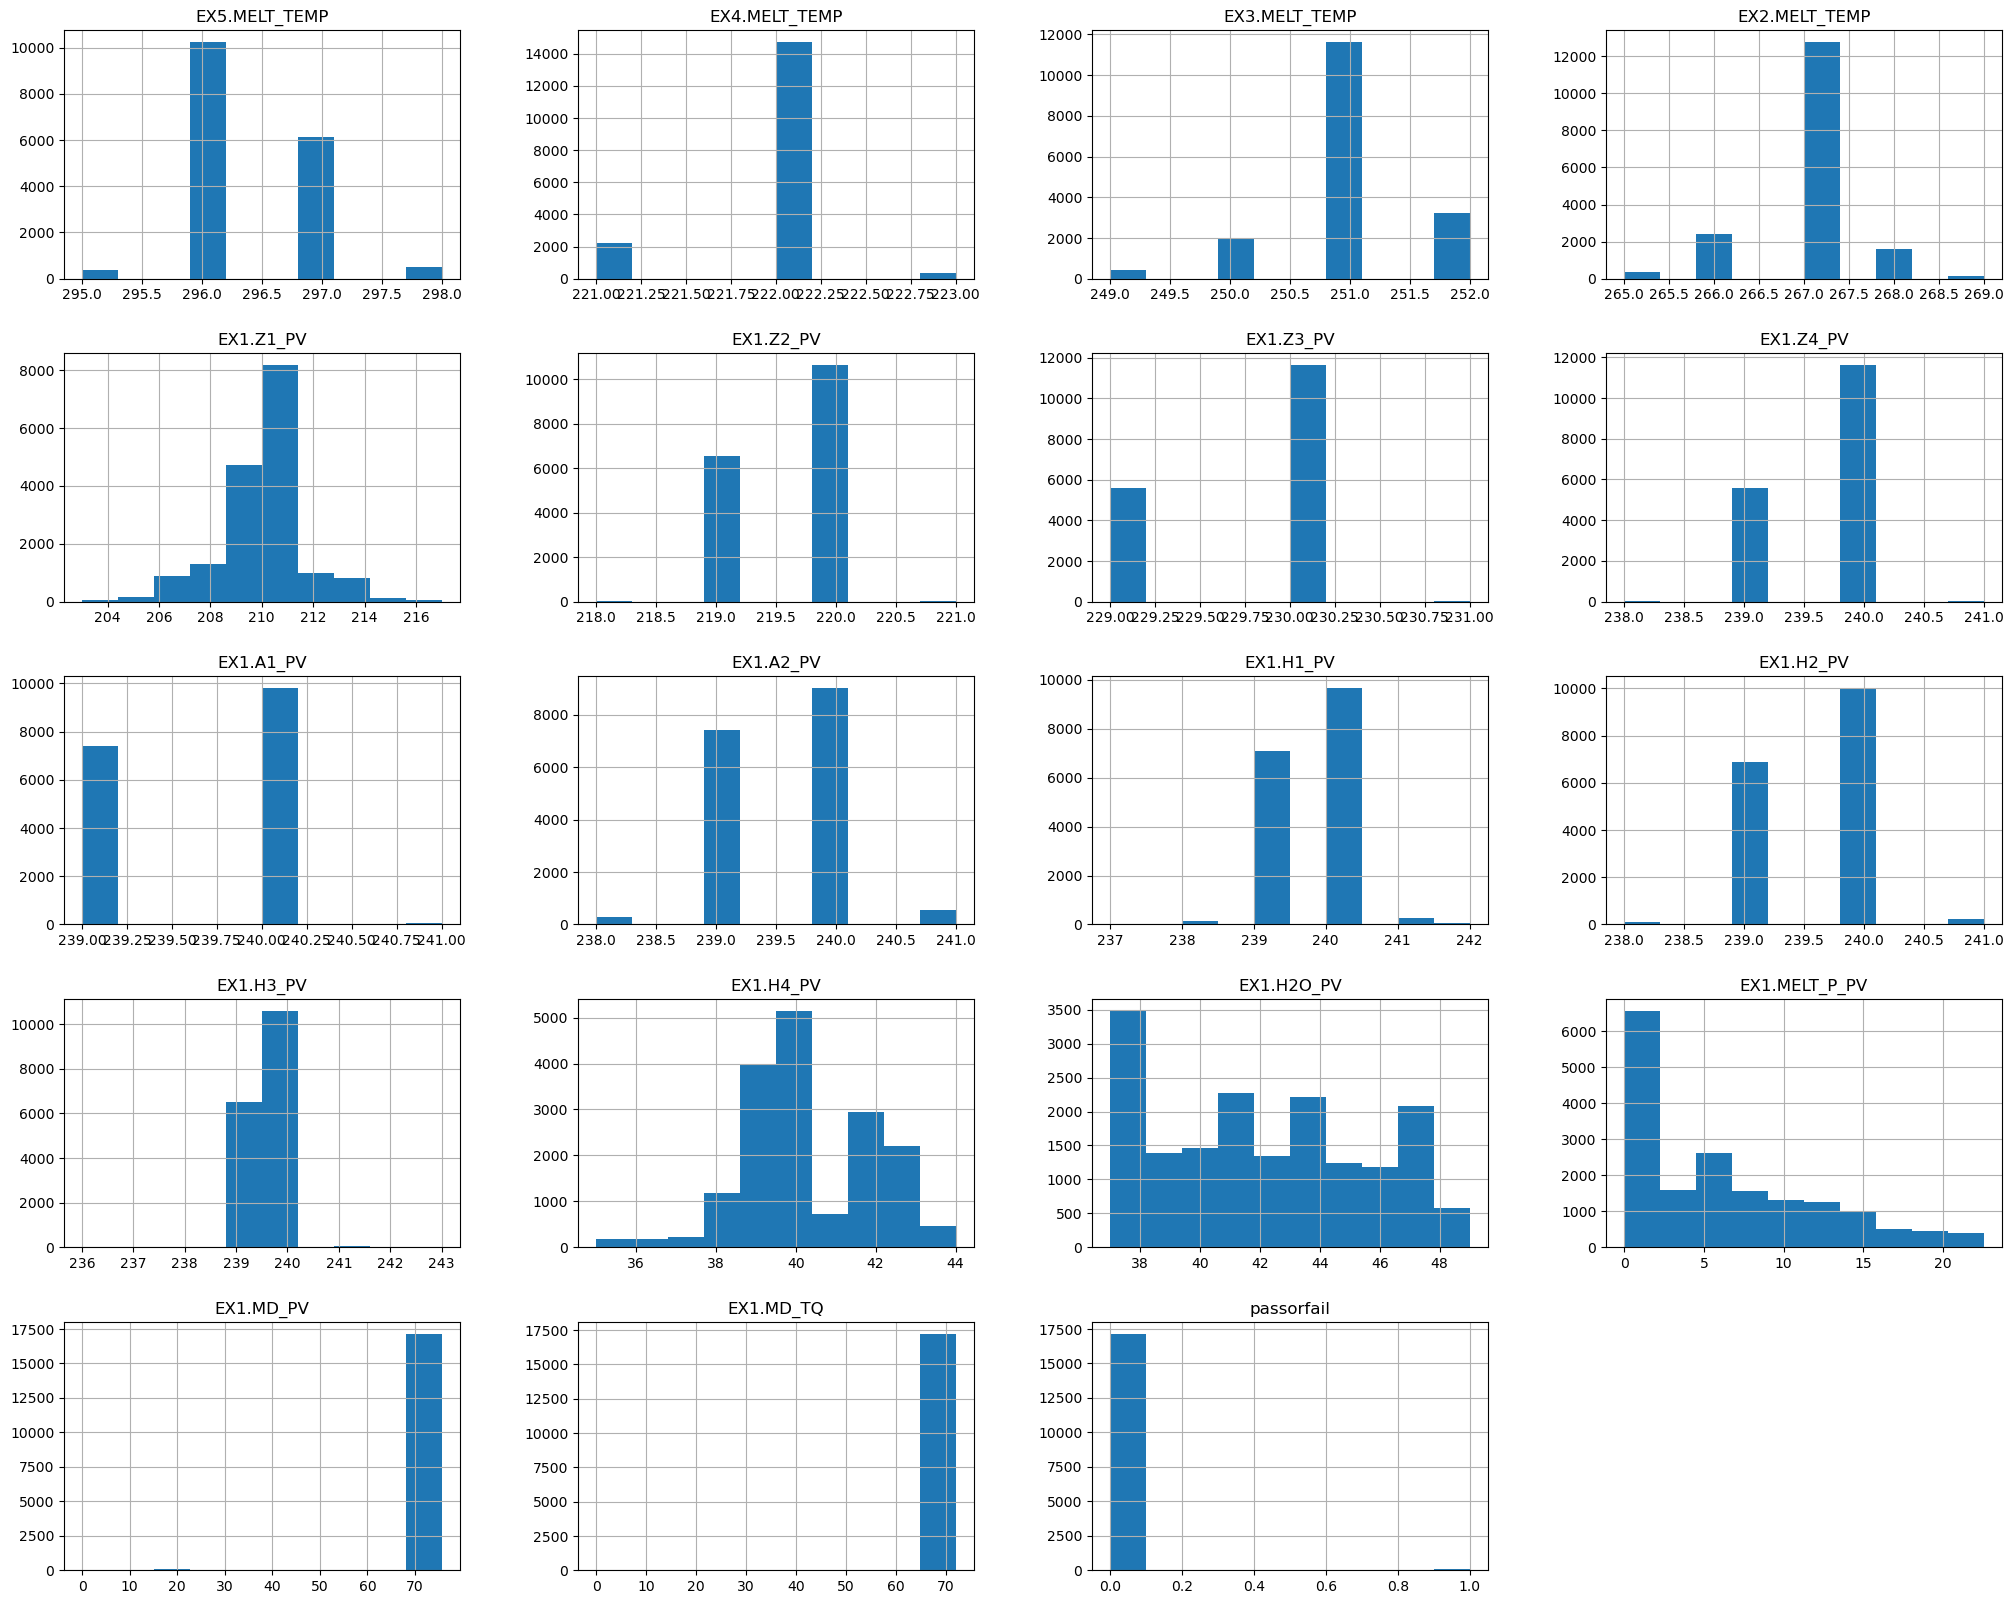

In [103]:
# 이상치 처리 후 변수 분포 시각화
preprocessed_df.hist(figsize=(25,20))
plt.show()

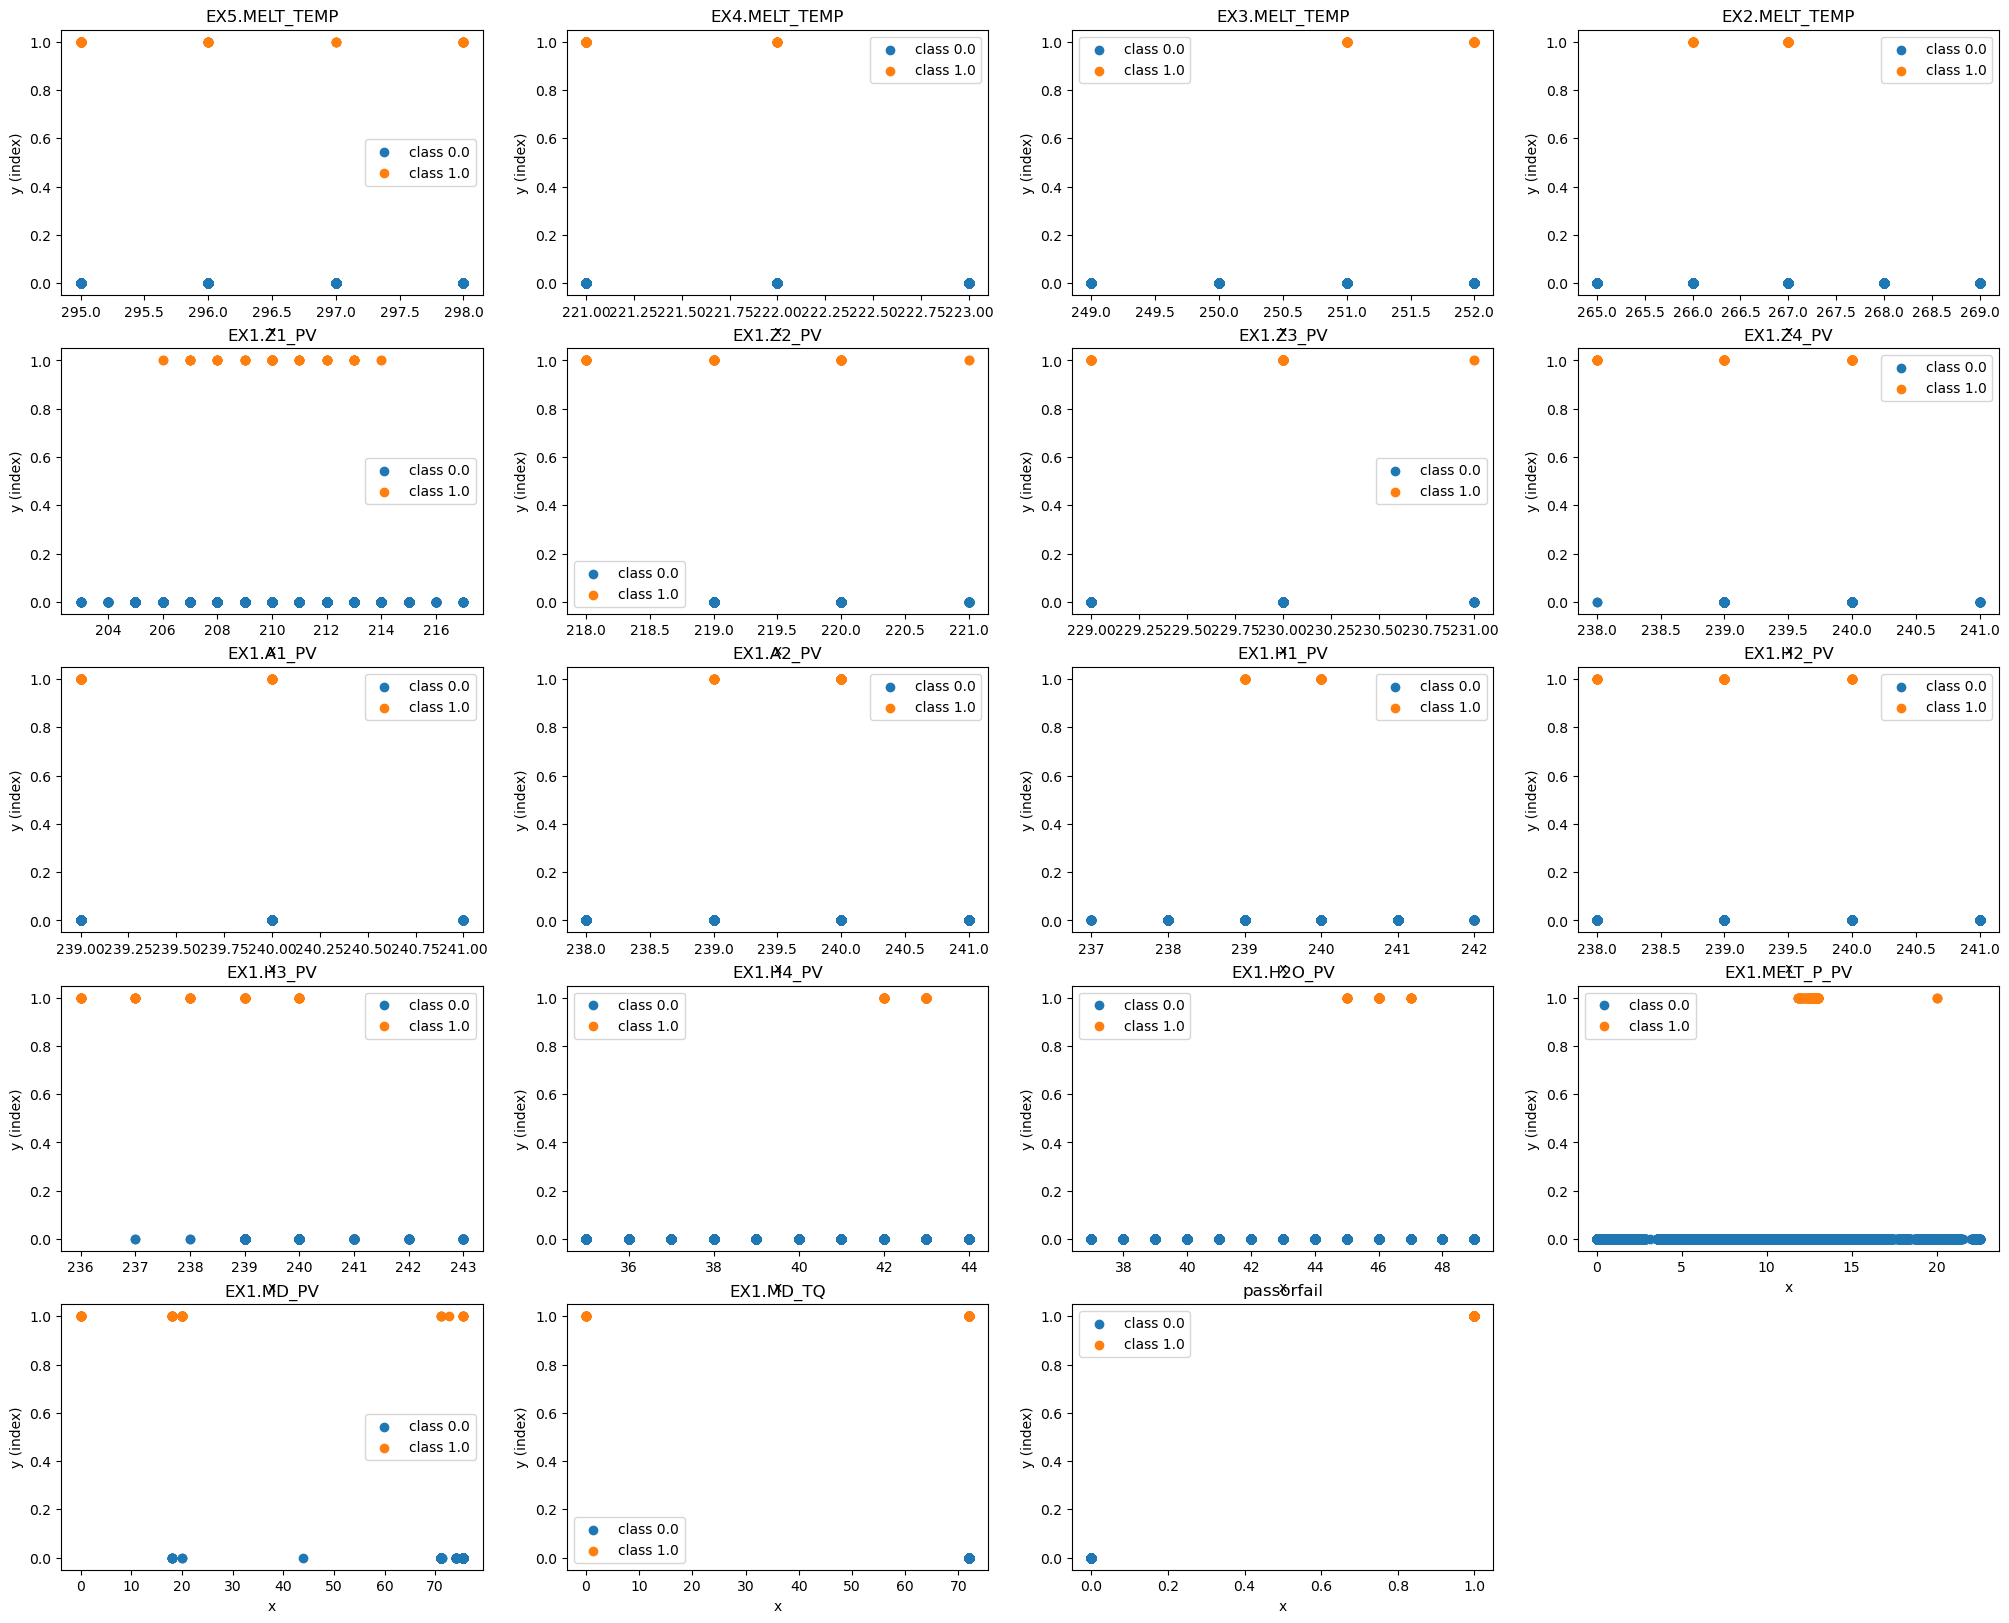

In [131]:
plt.figure(figsize=(25,20))
for i in range(len(preprocessed_df.columns)):
	plt.subplot(5,4,i+1)
	for cls in preprocessed_df['passorfail'].unique():
		subset = preprocessed_df[preprocessed_df['passorfail'] == cls]
		plt.scatter(subset[preprocessed_df.columns[i]], subset['passorfail'], label=f'class {cls}')

	plt.title(f'{preprocessed_df.columns[i]}')
	plt.xlabel('x')
	plt.ylabel('y (index)')
	plt.legend()
plt.show()

In [104]:
from scipy import stats

# 예: 불량(passorfail==1)과 양품(passorfail==0) 각각에 대해 정규성 확인
cols = preprocessed_df.columns[:-1]  # 마지막 컬럼은 passorfail

for col in cols:
    data_fail = preprocessed_df[preprocessed_df.passorfail==1][col]
    data_pass = preprocessed_df[preprocessed_df.passorfail==0][col]
    
    # Shapiro-Wilk test
    stat_fail, p_fail = stats.shapiro(data_fail)
    stat_pass, p_pass = stats.shapiro(data_pass)
    stat_total, p_total = stats.shapiro(preprocessed_df[col])
    
    print(f"{col}: 불량 p={p_fail:.4f}, 양품 p={p_pass:.4f}, 전체: p={p_total:.4f}")


EX5.MELT_TEMP: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX4.MELT_TEMP: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX3.MELT_TEMP: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX2.MELT_TEMP: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.Z1_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.Z2_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.Z3_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.Z4_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.A1_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.A2_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.H1_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.H2_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.H3_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.H4_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.H2O_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.MELT_P_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.MD_PV: 불량 p=0.0000, 양품 p=0.0000, 전체: p=0.0000
EX1.MD_TQ: 불량 p=0.0000, 양품 p=1.0000, 전체: p=0.0000


c:\Users\KDT45\anaconda3\envs\ML_ENV\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\KDT45\anaconda3\envs\ML_ENV\lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [105]:
## 양품집단과 불량 짐단 간의 유의미한 창를 보이는 변수로 선정하여 모델학습에 사용
## 탐색적 분석 (초기 가설 검증): 0.1%, 일반적인 연구/산업데이터 분석: 0.05%, 매우 엄격한 검증(의학, 품질보증 등): 0.01% 이하
cols = preprocessed_df.columns[:-1]  # 마지막 컬럼은 passorfail
selected_test = []

for col in cols:
    data_fail = preprocessed_df[preprocessed_df.passorfail==1][col]
    data_pass = preprocessed_df[preprocessed_df.passorfail==0][col]
    
    # Mann-Whitney U test (비정규 분포 대비)
    stat, pvalue = stats.mannwhitneyu(data_fail, data_pass, alternative='two-sided')
    
    selected_test.append([col, stat, pvalue])

# 결과를 DataFrame으로 변환
df_mwu = pd.DataFrame(selected_test, columns=['col', 'stat', 'pvalue'])

# 유의미한 변수 선택 (p <= 0.01)
t_list = df_mwu[df_mwu['pvalue'] <= 0.01]['col'].tolist()

# 선택 변수로 새로운 DataFrame 생성
df3 = preprocessed_df.loc[:, t_list + ['passorfail']]  # 타겟 컬럼 포함
df3

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,297.0,222.0,251.0,267.0,209.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0000,71.2215,72.0,0.0
1,297.0,222.0,251.0,268.0,210.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0000,71.2096,72.0,0.0
2,297.0,222.0,251.0,267.0,210.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
3,297.0,222.0,251.0,267.0,210.0,219.0,240.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
4,297.0,222.0,251.0,267.0,210.0,219.0,239.0,240.0,239.0,240.0,240.0,40.0,41.0,0.0000,71.1977,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,296.0,222.0,252.0,267.0,211.0,219.0,240.0,240.0,240.0,239.0,240.0,40.0,42.0,2.8000,71.2215,72.0,0.0
17260,296.0,222.0,252.0,267.0,211.0,219.0,240.0,240.0,240.0,240.0,240.0,40.0,42.0,2.8438,71.1977,72.0,0.0
17261,296.0,222.0,252.0,267.0,212.0,219.0,240.0,240.0,240.0,239.0,240.0,40.0,42.0,2.8438,71.2096,72.0,0.0
17262,296.0,222.0,252.0,267.0,212.0,219.0,240.0,239.0,240.0,239.0,240.0,40.0,42.0,2.8875,71.2096,72.0,0.0


<Axes: >

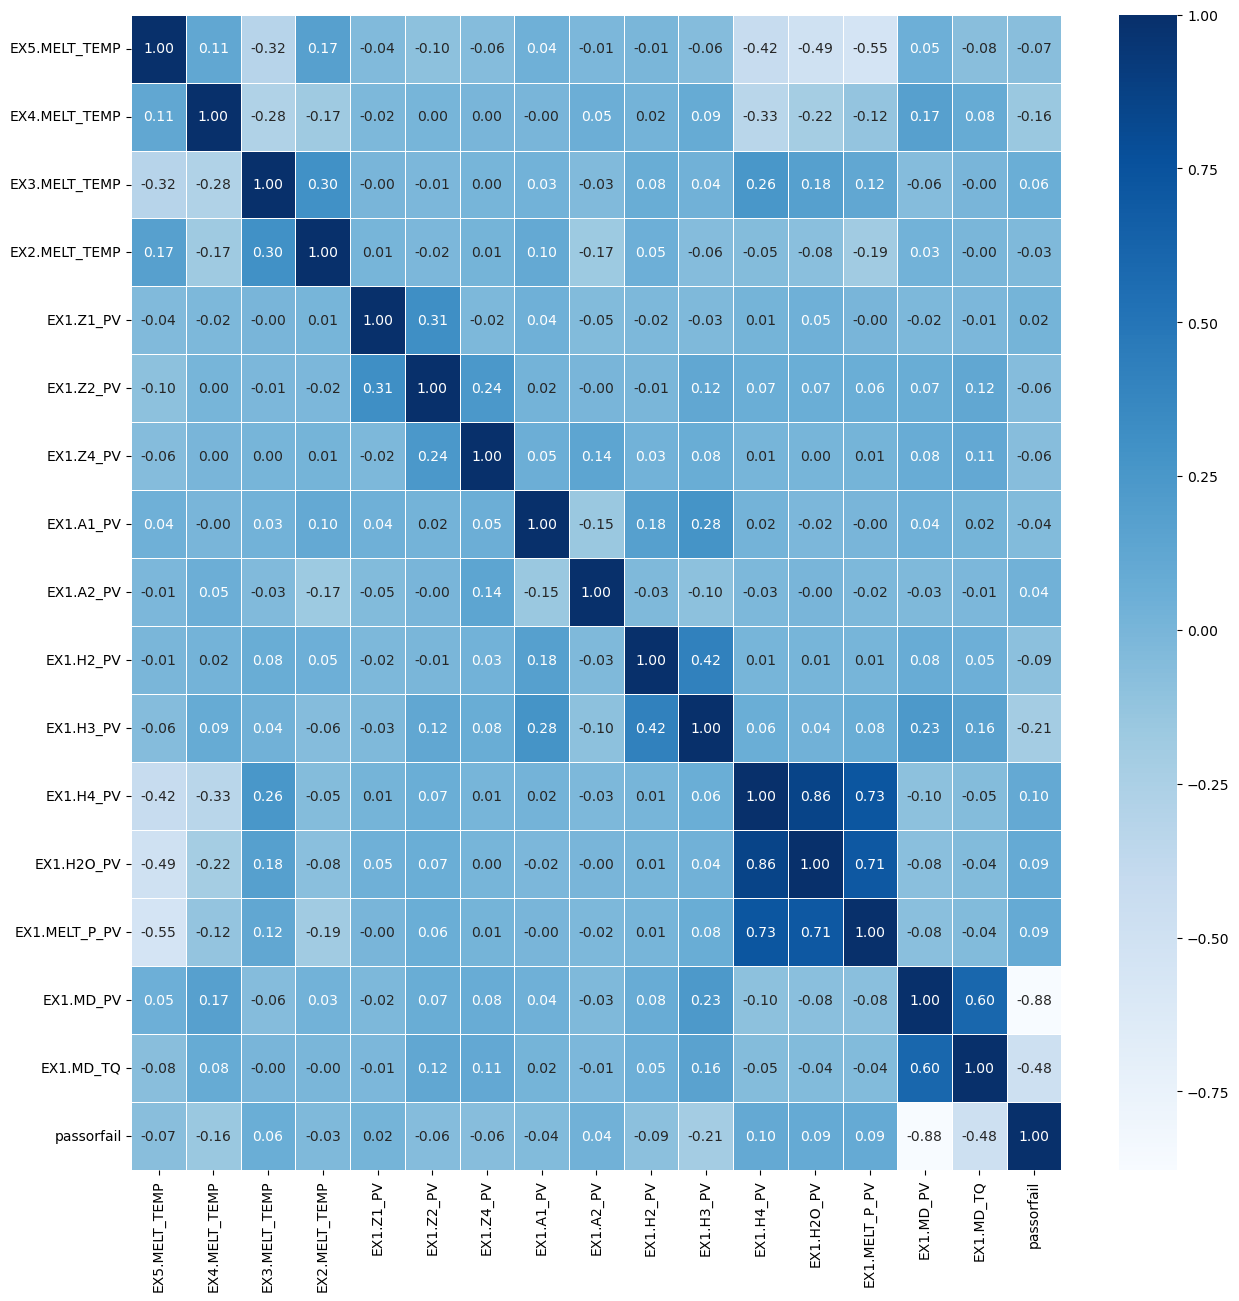

In [106]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df3.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [107]:
df3.to_csv('./data/preprocessed_data.csv')